First we import Pandas, then load in the dataset:

In [1]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        data = pd.read_csv(os.path.join(dirname, filename))

data

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...
307,zephyrosaurus,herbivorous,Early Cretaceous 120-110 million years ago,USA,euornithopod,1.8m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Sues (1980),schaffi,https://www.nhm.ac.uk/discover/dino-directory/...


The first visualization I want to create is a histogram showing the distribution of length across all of the dinosaurs. Let's check out the number of unique values in the 'length' column:

In [2]:
data['length'].value_counts()

length
6.0m     21
2.0m     19
5.0m     19
9.0m     19
3.0m     16
         ..
22.0m     1
8.2m      1
5.7m      1
6.4m      1
17.0m     1
Name: count, Length: 73, dtype: int64

From a first glance it seems like the lengths are more distributed within the 2 to 9-meter range.

Next, since the lengths are currently in string format with 'm' next to the numbers, let's use the .replace() method to replace all of the m's with empty spaces and then convert the numbers to floats.

In [3]:
data['length'] = data['length'].str.replace('m', '').astype(float)
data

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...
307,zephyrosaurus,herbivorous,Early Cretaceous 120-110 million years ago,USA,euornithopod,1.8,Dinosauria Ornithischia Genasauria Cerapoda Or...,Sues (1980),schaffi,https://www.nhm.ac.uk/discover/dino-directory/...


Since we've removed the 'm's from the length column, we need to rename the column to clarify the unit of measurement.

In [4]:
data.rename(columns={'length':'length (meters)'}, inplace=True)
data

,name,diet,period,lived_in,type,length (meters),taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...
307,zephyrosaurus,herbivorous,Early Cretaceous 120-110 million years ago,USA,euornithopod,1.8,Dinosauria Ornithischia Genasauria Cerapoda Or...,Sues (1980),schaffi,https://www.nhm.ac.uk/discover/dino-directory/...


Now we can create the histogram. Let's import Seaborn and use its .histplot method, using 'length (meters)' as the x axis. I've also added 'kde=True' to show the kernel density estimate.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length (meters)', ylabel='Count'>

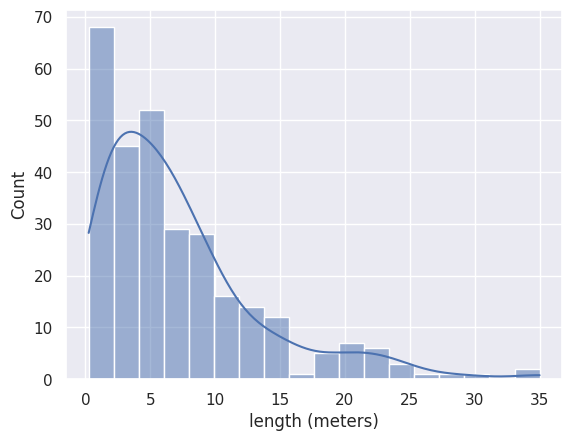

In [5]:
import seaborn as sns

sns.set_theme()
sns.histplot(data=data, x='length (meters)', kde=True)

The histogram appears to show that the dinosaurs in this dataset are more on the small side, with the density peaking at about 4 meters. There is a steep dropoff after this point, leveling out at about 15 meters. This makes sense when you consider how long 15 meters is; it is longer than a schoolbus, or about the length of a semi truck. The only dinosaurs that consistently reached a greater length were the sauropods, which are known as the largest and land animals to ever live.

Let's take a look specifically at the sauropods. First we'll need to filter the 'type' column on just the sauropods:

In [6]:
sauropods_df = data[data['type'] == 'sauropod']
sauropods_df.head(10)

,name,diet,period,lived_in,type,length (meters),taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
5,aegyptosaurus,herbivorous,Late Cretaceous 98-93 million years ago,Egypt,sauropod,15.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Stromer (1932),baharijensis,https://www.nhm.ac.uk/discover/dino-directory/...
8,alamosaurus,herbivorous,Late Cretaceous 70-65 million years ago,USA,sauropod,21.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Gilmore (1922),sanjuanensis,https://www.nhm.ac.uk/discover/dino-directory/...
15,amargasaurus,herbivorous,Early Cretaceous 132-127 million years ago,Argentina,sauropod,12.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Salgado and Bonaparte (1991),cazaui,https://www.nhm.ac.uk/discover/dino-directory/...
16,ammosaurus,herbivorous,Early Jurassic 195-180 million years ago,USA,sauropod,5.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Marsh (1891),major,https://www.nhm.ac.uk/discover/dino-directory/...
17,ampelosaurus,herbivorous,Late Cretaceous 71-65 million years ago,France,sauropod,15.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Le Loeuff (1995),atacis,https://www.nhm.ac.uk/discover/dino-directory/...
18,amygdalodon,herbivorous,Mid Jurassic 177-169 million years ago,Argentina,sauropod,15.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Cabrera (1947),patagonicus,https://www.nhm.ac.uk/discover/dino-directory/...
20,anchisaurus,herbivorous,Early Jurassic 190 million years ago,USA,sauropod,2.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,Marsh (1885),polyzelous,https://www.nhm.ac.uk/discover/dino-directory/...
23,antarctosaurus,herbivorous,Late Cretaceous 84-65 million years ago,Uruguay,sauropod,18.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,von Huene (1929),wichmannianus,https://www.nhm.ac.uk/discover/dino-directory/...
24,apatosaurus,herbivorous,Late Jurassic 154-145 million years ago,USA,sauropod,21.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,Marsh (1877),ajax,https://www.nhm.ac.uk/discover/dino-directory/...


Now let's plot a histogram like we did before.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length (meters)', ylabel='Count'>

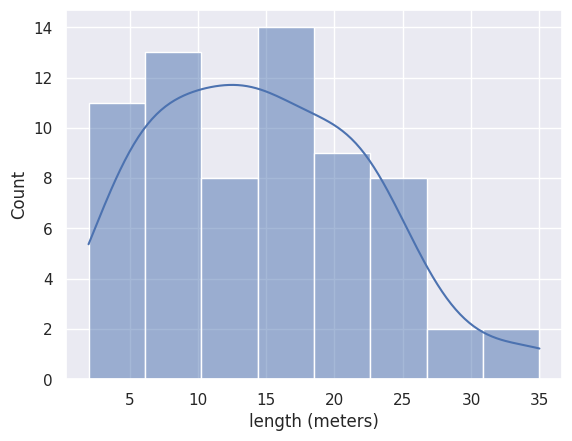

In [7]:
sns.histplot(data=sauropods_df, x='length (meters)', kde=True)

Surprisingly, this histogram seems to show that the length of the sauropods is distributed relatively evenly, with the density appearing to peak at about 12 meters. The dataset unfortunately does not include the height of the sauropods, which almost certainly was greater than the length in many cases, so it's possible that the length alone isn't giving us the full picture of these dinosaurs' sizes.

Let's try increasing the bins to see if this distribution stays consistent.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length (meters)', ylabel='Count'>

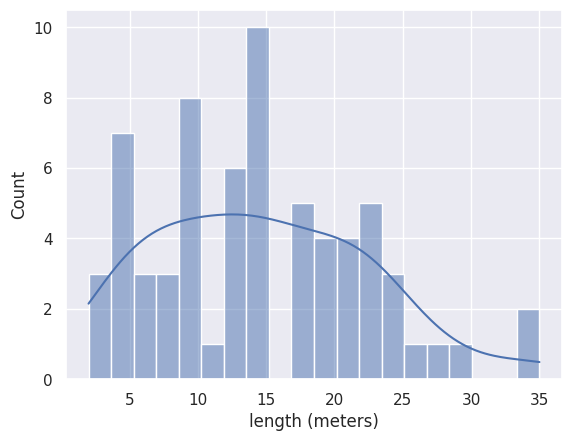

In [8]:
sns.histplot(data=sauropods_df, x='length (meters)', bins=20, kde=True)

The distribution is staying consistent, and this further shows us that there is a small peak just below 15 meters.

The main takeaway when we compare this distribution to the one for all of the dinosaurs is that sauropods' lengths tended to be much greater than that of the other dinosaurs; while most dinosaurs' lengths fell under 15 meters, this length was the norm for sauropods, and it was not uncommon for them to reach lengths of 20 to 30 meters. Still, they were more diverse in size than one would expect.